In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse 
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\CoffeeML1.csv", parse_dates =["timestamp"])

count_row = df.shape[0]  # gives number of row count
count_column = df.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

df.head()

Number of rows: 13588472
Number of columns: 11


timestamp  AnalogVibrationSensor.vibrationTotal  \
0 2020-07-16 00:00:00.024000+00:00                                   NaN   
1 2020-07-16 00:00:00.026000+00:00                                1548.0   
2 2020-07-16 00:00:00.134000+00:00                                   NaN   
3 2020-07-16 00:00:00.135000+00:00                                1550.0   
4 2020-07-16 00:00:00.236000+00:00                                   NaN   

   TemperatureAndHumiditySensor.humidity  AnalogNoiseSensor.noiseDiff  \
0                                    NaN                         12.0   
1                                    NaN                          NaN   
2                                    NaN                          3.0   
3                                    NaN                          NaN   
4                                    NaN                          6.0   

   TemperatureAndHumiditySensor.temperature  AnalogNoiseSensor.noiseRange  \
0                                       NaN                          17.0   
1                                       NaN                           NaN   
2                                       NaN                          11.0   
3                                       NaN                           NaN   
4                                       NaN                           6.0   

   AnalogVibrationSensor.vibrationDiff  AnalogVibrationSensor.vibrationRange  \
0                                  NaN                                   NaN   
1                                  0.0                                   2.0   
2                                  NaN                                   NaN   
3                                  0.0                                   2.0   
4                                  NaN                                   NaN   

   VibrationThresholdSensor.vibrationThreshold  AnalogNoiseSensor.noiseTotal  \
0                                          NaN                       15091.0   
1                                          1.0                           NaN   
2                                          NaN                       14695.0   
3                                          1.0                           NaN   
4                                          NaN                       15082.0   

   Keypad.keyPressed  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [3]:
df.columns

Index(['timestamp', 'AnalogVibrationSensor.vibrationTotal',
       'TemperatureAndHumiditySensor.humidity', 'AnalogNoiseSensor.noiseDiff',
       'TemperatureAndHumiditySensor.temperature',
       'AnalogNoiseSensor.noiseRange', 'AnalogVibrationSensor.vibrationDiff',
       'AnalogVibrationSensor.vibrationRange',
       'VibrationThresholdSensor.vibrationThreshold',
       'AnalogNoiseSensor.noiseTotal', 'Keypad.keyPressed'],
      dtype='object')

In [4]:
# convert the 'timestamp' column to datetime format 
type(df.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13588472 entries, 0 to 13588471
Data columns (total 11 columns):
 #   Column                                       Dtype              
---  ------                                       -----              
 0   timestamp                                    datetime64[ns, UTC]
 1   AnalogVibrationSensor.vibrationTotal         float64            
 2   TemperatureAndHumiditySensor.humidity        float64            
 3   AnalogNoiseSensor.noiseDiff                  float64            
 4   TemperatureAndHumiditySensor.temperature     float64            
 5   AnalogNoiseSensor.noiseRange                 float64            
 6   AnalogVibrationSensor.vibrationDiff          float64            
 7   AnalogVibrationSensor.vibrationRange         float64            
 8   VibrationThresholdSensor.vibrationThreshold  float64            
 9   AnalogNoiseSensor.noiseTotal                 float64            
 10  Keypad.keyPressed                       

In [6]:
df = df.drop_duplicates(["timestamp"])

In [7]:
df.nunique()

timestamp                                      13588472
AnalogVibrationSensor.vibrationTotal                 89
TemperatureAndHumiditySensor.humidity               195
AnalogNoiseSensor.noiseDiff                          82
TemperatureAndHumiditySensor.temperature            106
AnalogNoiseSensor.noiseRange                         75
AnalogVibrationSensor.vibrationDiff                   8
AnalogVibrationSensor.vibrationRange                  9
VibrationThresholdSensor.vibrationThreshold           2
AnalogNoiseSensor.noiseTotal                       8927
Keypad.keyPressed                                     5
dtype: int64

In [35]:
df1= df.set_index('timestamp')
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [36]:
print(df1.columns)

Index(['AnalogVibrationSensor.vibrationTotal',
       'TemperatureAndHumiditySensor.humidity', 'AnalogNoiseSensor.noiseDiff',
       'TemperatureAndHumiditySensor.temperature',
       'AnalogNoiseSensor.noiseRange', 'AnalogVibrationSensor.vibrationDiff',
       'AnalogVibrationSensor.vibrationRange',
       'VibrationThresholdSensor.vibrationThreshold',
       'AnalogNoiseSensor.noiseTotal', 'Keypad.keyPressed'],
      dtype='object')


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13588472 entries, 2020-07-16 00:00:00.024000+00:00 to 2020-07-22 23:59:59.933000+00:00
Data columns (total 10 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   AnalogVibrationSensor.vibrationTotal         float64
 1   TemperatureAndHumiditySensor.humidity        float64
 2   AnalogNoiseSensor.noiseDiff                  float64
 3   TemperatureAndHumiditySensor.temperature     float64
 4   AnalogNoiseSensor.noiseRange                 float64
 5   AnalogVibrationSensor.vibrationDiff          float64
 6   AnalogVibrationSensor.vibrationRange         float64
 7   VibrationThresholdSensor.vibrationThreshold  float64
 8   AnalogNoiseSensor.noiseTotal                 float64
 9   Keypad.keyPressed                            float64
dtypes: float64(10)
memory usage: 1.1 GB


In [39]:
df1[0:100]

AnalogVibrationSensor.vibrationTotal  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                                   NaN   
2020-07-16 00:00:00.026000+00:00                                1548.0   
2020-07-16 00:00:00.134000+00:00                                   NaN   
2020-07-16 00:00:00.135000+00:00                                1550.0   
2020-07-16 00:00:00.236000+00:00                                   NaN   
...                                                                ...   
2020-07-16 00:00:04.430000+00:00                                   NaN   
2020-07-16 00:00:04.526000+00:00                                   NaN   
2020-07-16 00:00:04.540000+00:00                                1554.0   
2020-07-16 00:00:04.650000+00:00                                   NaN   
2020-07-16 00:00:04.652000+00:00                                1551.0   

                                  TemperatureAndHumiditySensor.humidity  \
timestamp                                                                 
2020-07-16 00:00:00.024000+00:00                                    NaN   
2020-07-16 00:00:00.026000+00:00                                    NaN   
2020-07-16 00:00:00.134000+00:00                                    NaN   
2020-07-16 00:00:00.135000+00:00                                    NaN   
2020-07-16 00:00:00.236000+00:00                                    NaN   
...                                                                 ...   
2020-07-16 00:00:04.430000+00:00                                    NaN   
2020-07-16 00:00:04.526000+00:00                                    NaN   
2020-07-16 00:00:04.540000+00:00                                    NaN   
2020-07-16 00:00:04.650000+00:00                                    NaN   
2020-07-16 00:00:04.652000+00:00                                    NaN   

                                  AnalogNoiseSensor.noiseDiff  \
timestamp                                                       
2020-07-16 00:00:00.024000+00:00                         12.0   
2020-07-16 00:00:00.026000+00:00                          NaN   
2020-07-16 00:00:00.134000+00:00                          3.0   
2020-07-16 00:00:00.135000+00:00                          NaN   
2020-07-16 00:00:00.236000+00:00                          6.0   
...                                                       ...   
2020-07-16 00:00:04.430000+00:00                          NaN   
2020-07-16 00:00:04.526000+00:00                          4.0   
2020-07-16 00:00:04.540000+00:00                          NaN   
2020-07-16 00:00:04.650000+00:00                          1.0   
2020-07-16 00:00:04.652000+00:00                          NaN   

                                  TemperatureAndHumiditySensor.temperature  \
timestamp                                                                    
2020-07-16 00:00:00.024000+00:00                                       NaN   
2020-07-16 00:00:00.026000+00:00                                       NaN   
2020-07-16 00:00:00.134000+00:00                                       NaN   
2020-07-16 00:00:00.135000+00:00                                       NaN   
2020-07-16 00:00:00.236000+00:00                                       NaN   
...                                                                    ...   
2020-07-16 00:00:04.430000+00:00                                       NaN   
2020-07-16 00:00:04.526000+00:00                                       NaN   
2020-07-16 00:00:04.540000+00:00                                       NaN   
2020-07-16 00:00:04.650000+00:00                                       NaN   
2020-07-16 00:00:04.652000+00:00                                       NaN   

                                  AnalogNoiseSensor.noiseRange  \
timestamp                                                        
2020-07-16 00:00:00.024000+00:00                          17.0   
2020-07-16 00:00:00.026000+00:00    

In [9]:
df1.index

DatetimeIndex(['2020-07-16 00:00:00.024000+00:00',
               '2020-07-16 00:00:00.026000+00:00',
               '2020-07-16 00:00:00.134000+00:00',
               '2020-07-16 00:00:00.135000+00:00',
               '2020-07-16 00:00:00.236000+00:00',
               '2020-07-16 00:00:00.244000+00:00',
               '2020-07-16 00:00:00.354000+00:00',
               '2020-07-16 00:00:00.355000+00:00',
               '2020-07-16 00:00:00.385000+00:00',
               '2020-07-16 00:00:00.465000+00:00',
               ...
               '2020-07-22 23:59:59.495000+00:00',
               '2020-07-22 23:59:59.603000+00:00',
               '2020-07-22 23:59:59.604000+00:00',
               '2020-07-22 23:59:59.661000+00:00',
               '2020-07-22 23:59:59.705000+00:00',
               '2020-07-22 23:59:59.713000+00:00',
               '2020-07-22 23:59:59.824000+00:00',
               '2020-07-22 23:59:59.825000+00:00',
               '2020-07-22 23:59:59.926000+00:00',
            

Missing values for each of the given Variables

In [10]:
df1.isnull().sum()

AnalogVibrationSensor.vibrationTotal            8098060
TemperatureAndHumiditySensor.humidity          12593318
AnalogNoiseSensor.noiseDiff                     8098060
TemperatureAndHumiditySensor.temperature       12593318
AnalogNoiseSensor.noiseRange                    8098061
AnalogVibrationSensor.vibrationDiff             8098058
AnalogVibrationSensor.vibrationRange            8098058
VibrationThresholdSensor.vibrationThreshold     8098058
AnalogNoiseSensor.noiseTotal                    8098059
Keypad.keyPressed                              13586170
dtype: int64

In [11]:
df1['Keypad.keyPressed'].value_counts()

1.0    1148
3.0     779
4.0     246
2.0     123
0.0       6
Name: Keypad.keyPressed, dtype: int64

Descriptive statistics

In [12]:
df1.describe()

AnalogVibrationSensor.vibrationTotal  \
count                          5.490412e+06   
mean                           1.560209e+03   
std                            1.186886e+01   
min                            1.520000e+03   
25%                            1.552000e+03   
50%                            1.558000e+03   
75%                            1.567000e+03   
max                            1.615000e+03   

       TemperatureAndHumiditySensor.humidity  AnalogNoiseSensor.noiseDiff  \
count                          995154.000000                 5.490412e+06   
mean                               43.048134                 8.154107e+00   
std                                 3.913398                 6.230555e+00   
min                                36.000000                -3.000000e+00   
25%                                39.562500                 3.000000e+00   
50%                                44.500000                 7.000000e+00   
75%                                46.750000                 1.200000e+01   
max                                48.125000                 1.080000e+02   

       TemperatureAndHumiditySensor.temperature  AnalogNoiseSensor.noiseRange  \
count                             995154.000000                  5.490411e+06   
mean                                  30.308984                  1.242352e+01   
std                                    0.739273                  5.114193e+00   
min                                   29.218750                  2.000000e+00   
25%                                   29.750000                  9.000000e+00   
50%                                   30.093750                  1.100000e+01   
75%                                   30.656250                  1.500000e+01   
max                                   32.500000                  1.070000e+02   

       AnalogVibrationSensor.vibrationDiff  \
count                         5.490414e+06   
mean                          1.871374e-01   
std                           4.964063e-01   
min                          -3.000000e+00   
25%                           0.000000e+00   
50%                           0.000000e+00   
75%                           0.000000e+00   
max                           4.000000e+00   

       AnalogVibrationSensor.vibrationRange  \
count                          5.490414e+06   
mean                           1.959203e+00   
std                            4.559033e-01   
min                            1.000000e+00   
25%                            2.000000e+00   
50%                            2.000000e+00   
75%                            2.000000e+00   
max                            1.400000e+01   

       VibrationThresholdSensor.vibrationThreshold  \
count                                 5.490414e+06   
mean                                  9.998272e-01   
std                                   1.314598e-02   
min                                   0.000000e+00   
25%                                   1.000000e+00   
50%                                   1.000000e+00   
75%                                   1.000000e+00   
max                                   1.000000e+00   

       AnalogNoiseSensor.noiseTotal  Keypad.keyPressed  
count                  5.490413e+06        2302.000000  
mean                   1.454972e+04           2.048219  
std                    9.458379e+02           1.128364  
min                    4.059000e+03           0.000000  
25%                    1.391200e+04           1.000000  
50%                    1.453900e+04           1.000000  
75%                    1.517600e+04           3.000000  
max                    2.901200e+04           4.000000

In [13]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 7)})

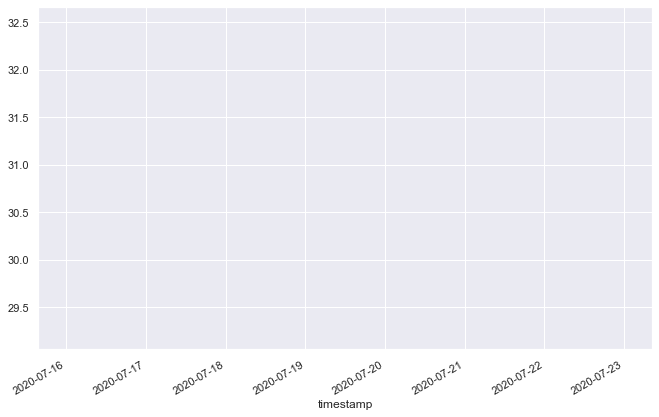

In [14]:
df1['TemperatureAndHumiditySensor.temperature'].plot(linewidth=0.5);

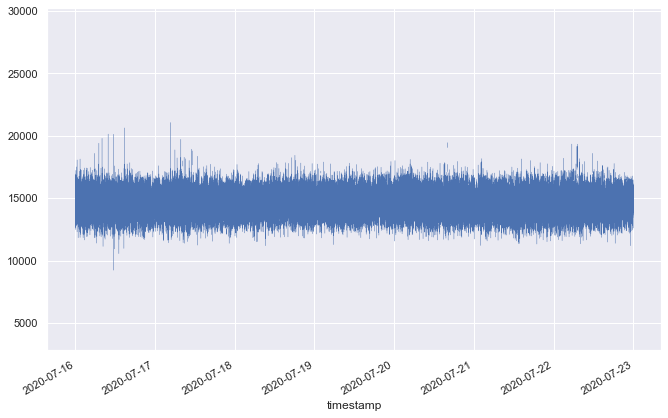

In [15]:
df1['AnalogNoiseSensor.noiseTotal'].plot(linewidth=0.5);

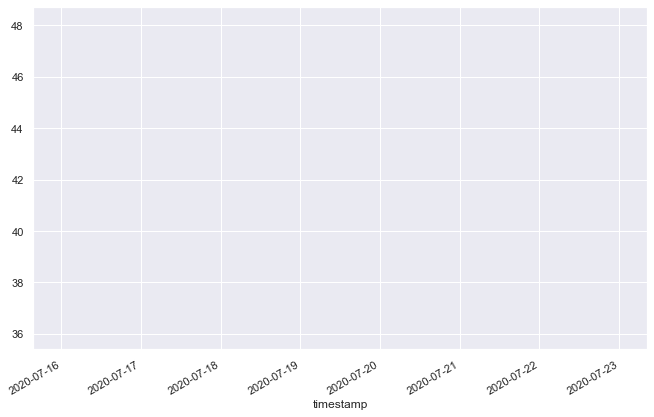

In [16]:
df1['TemperatureAndHumiditySensor.humidity'].plot(linewidth=0.5);

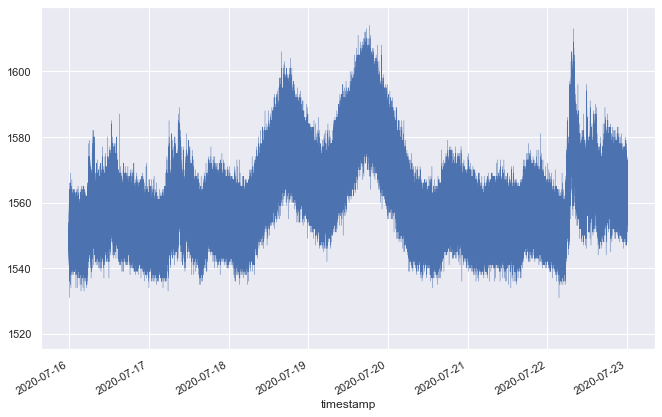

In [17]:
df1['AnalogVibrationSensor.vibrationTotal'].plot(linewidth=0.5);

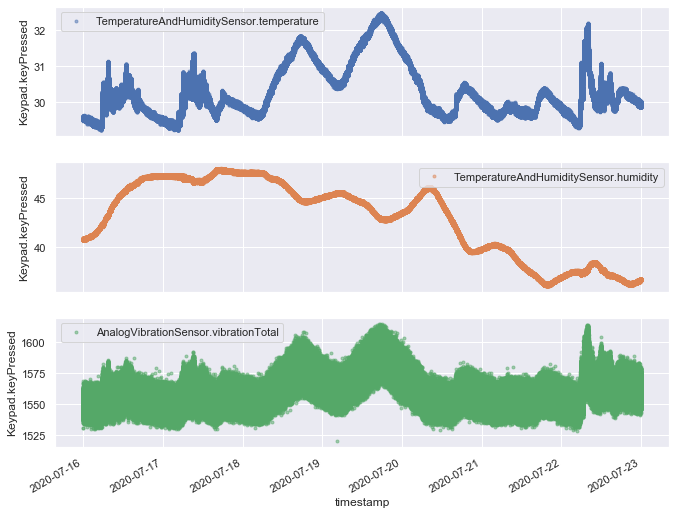

In [18]:
cols_plot = ['TemperatureAndHumiditySensor.temperature', 'TemperatureAndHumiditySensor.humidity', 'AnalogVibrationSensor.vibrationTotal']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Keypad.keyPressed')

In [19]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

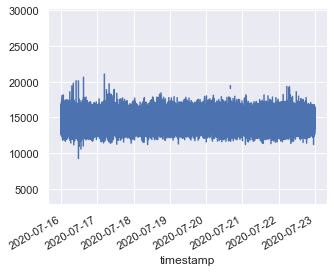

In [20]:
df1['AnalogNoiseSensor.noiseTotal'].plot()

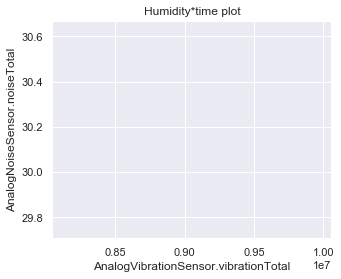

In [21]:
df1 = df.sample(n=100, random_state=25, axis=0)

plt.xlabel('AnalogVibrationSensor.vibrationTotal')
plt.ylabel('AnalogNoiseSensor.noiseTotal')
plt.title('Humidity*time plot')

df1['TemperatureAndHumiditySensor.temperature'].plot()

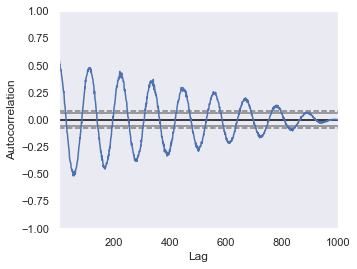

In [22]:
from pandas.plotting import autocorrelation_plot

plt.figure()


spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)

df1= pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

autocorrelation_plot(df1)


In [31]:
# Add columns with year, month, and weekday name
#df_y = df1.index.year
print(type(df1.index))
#df_m = df1.index.month
#df_d = df1.index.day

<class 'pandas.core.indexes.base.Index'>


In [26]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['Date'] = df1['timestamp'].dt.strftime('%d/%m/%Y')
df1['Time'] = df1['timestamp'].dt.strftime('%H:%M')

In [27]:
df1['Date']

0           16/07/2020
1           16/07/2020
2           16/07/2020
3           16/07/2020
4           16/07/2020
               ...    
13588467    22/07/2020
13588468    22/07/2020
13588469    22/07/2020
13588470    22/07/2020
13588471    22/07/2020
Name: timestamp, Length: 13588472, dtype: object

In [42]:
df2 = df1[0:100000] # first 100000 rows of dataframe
df2

AnalogVibrationSensor.vibrationTotal  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                                   NaN   
2020-07-16 00:00:00.026000+00:00                                1548.0   
2020-07-16 00:00:00.134000+00:00                                   NaN   
2020-07-16 00:00:00.135000+00:00                                1550.0   
2020-07-16 00:00:00.236000+00:00                                   NaN   
...                                                                ...   
2020-07-16 01:14:15.306000+00:00                                1554.0   
2020-07-16 01:14:15.414000+00:00                                   NaN   
2020-07-16 01:14:15.416000+00:00                                1555.0   
2020-07-16 01:14:15.525000+00:00                                   NaN   
2020-07-16 01:14:15.526000+00:00                                1550.0   

                                  TemperatureAndHumiditySensor.humidity  \
timestamp                                                                 
2020-07-16 00:00:00.024000+00:00                                    NaN   
2020-07-16 00:00:00.026000+00:00                                    NaN   
2020-07-16 00:00:00.134000+00:00                                    NaN   
2020-07-16 00:00:00.135000+00:00                                    NaN   
2020-07-16 00:00:00.236000+00:00                                    NaN   
...                                                                 ...   
2020-07-16 01:14:15.306000+00:00                                    NaN   
2020-07-16 01:14:15.414000+00:00                                    NaN   
2020-07-16 01:14:15.416000+00:00                                    NaN   
2020-07-16 01:14:15.525000+00:00                                    NaN   
2020-07-16 01:14:15.526000+00:00                                    NaN   

                                  AnalogNoiseSensor.noiseDiff  \
timestamp                                                       
2020-07-16 00:00:00.024000+00:00                         12.0   
2020-07-16 00:00:00.026000+00:00                          NaN   
2020-07-16 00:00:00.134000+00:00                          3.0   
2020-07-16 00:00:00.135000+00:00                          NaN   
2020-07-16 00:00:00.236000+00:00                          6.0   
...                                                       ...   
2020-07-16 01:14:15.306000+00:00                          NaN   
2020-07-16 01:14:15.414000+00:00                          9.0   
2020-07-16 01:14:15.416000+00:00                          NaN   
2020-07-16 01:14:15.525000+00:00                          1.0   
2020-07-16 01:14:15.526000+00:00                          NaN   

                                  TemperatureAndHumiditySensor.temperature  \
timestamp                                                                    
2020-07-16 00:00:00.024000+00:00                                       NaN   
2020-07-16 00:00:00.026000+00:00                                       NaN   
2020-07-16 00:00:00.134000+00:00                                       NaN   
2020-07-16 00:00:00.135000+00:00                                       NaN   
2020-07-16 00:00:00.236000+00:00                                       NaN   
...                                                                    ...   
2020-07-16 01:14:15.306000+00:00                                       NaN   
2020-07-16 01:14:15.414000+00:00                                       NaN   
2020-07-16 01:14:15.416000+00:00                                       NaN   
2020-07-16 01:14:15.525000+00:00                                       NaN   
2020-07-16 01:14:15.526000+00:00                                       NaN   

                                  AnalogNoiseSensor.noiseRange  \
timestamp                                                        
2020-07-16 00:00:00.024000+00:00                          17.0   
2020-07-16 00:00:00.026000+00:00    

In [61]:
import plotly.express as px
fig = px.line(df2, x='AnalogNoiseSensor.noiseTotal',y = 'AnalogVibrationSensor.vibrationTotal',title= 'AnalogNoiseSensor vs nalogVibrationSensor with slider')

fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 day", step="day", stepmode="backward"),
            dict(count=2, label="4 day", step="day", stepmode="backward"),
            dict(count=3, label="7 day", step="day", stepmode="backward"),
            dict(step="all")
        ])
     )
)
fig.show()

In [63]:
import plotly.express as px
fig = px.line(df2, x='AnalogVibrationSensor.vibrationDiff',y = 'AnalogVibrationSensor.vibrationRange',title= 'TemperatureAndHumiditySensor.temperature with slider')

fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 day", step="day", stepmode="backward"),
            dict(count=2, label="4 day", step="day", stepmode="backward"),
            dict(count=3, label="7 day", step="day", stepmode="backward"),
            dict(step="all")
        ])
     )
)
fig.show()

In [ ]:
# Create figure
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df2.AnalogNoiseSensor.noiseTotal, y=list(df2.TemperatureAndHumiditySensor.temperature))))

In [ ]:
# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors for TemperatureAndHumiditySensor.temperature "
)


In [ ]:

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

Separating the data set into dependable and independent variables

In [48]:
X, y = df1.drop(['Keypad.keyPressed'], axis=1), df1['Keypad.keyPressed']
X

AnalogVibrationSensor.vibrationTotal  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                                   NaN   
2020-07-16 00:00:00.026000+00:00                                1548.0   
2020-07-16 00:00:00.134000+00:00                                   NaN   
2020-07-16 00:00:00.135000+00:00                                1550.0   
2020-07-16 00:00:00.236000+00:00                                   NaN   
...                                                                ...   
2020-07-22 23:59:59.713000+00:00                                1564.0   
2020-07-22 23:59:59.824000+00:00                                   NaN   
2020-07-22 23:59:59.825000+00:00                                1563.0   
2020-07-22 23:59:59.926000+00:00                                   NaN   
2020-07-22 23:59:59.933000+00:00                                1559.0   

                                  TemperatureAndHumiditySensor.humidity  \
timestamp                                                                 
2020-07-16 00:00:00.024000+00:00                                    NaN   
2020-07-16 00:00:00.026000+00:00                                    NaN   
2020-07-16 00:00:00.134000+00:00                                    NaN   
2020-07-16 00:00:00.135000+00:00                                    NaN   
2020-07-16 00:00:00.236000+00:00                                    NaN   
...                                                                 ...   
2020-07-22 23:59:59.713000+00:00                                    NaN   
2020-07-22 23:59:59.824000+00:00                                    NaN   
2020-07-22 23:59:59.825000+00:00                                    NaN   
2020-07-22 23:59:59.926000+00:00                                    NaN   
2020-07-22 23:59:59.933000+00:00                                    NaN   

                                  AnalogNoiseSensor.noiseDiff  \
timestamp                                                       
2020-07-16 00:00:00.024000+00:00                         12.0   
2020-07-16 00:00:00.026000+00:00                          NaN   
2020-07-16 00:00:00.134000+00:00                          3.0   
2020-07-16 00:00:00.135000+00:00                          NaN   
2020-07-16 00:00:00.236000+00:00                          6.0   
...                                                       ...   
2020-07-22 23:59:59.713000+00:00                          NaN   
2020-07-22 23:59:59.824000+00:00                         15.0   
2020-07-22 23:59:59.825000+00:00                          NaN   
2020-07-22 23:59:59.926000+00:00                          0.0   
2020-07-22 23:59:59.933000+00:00                          NaN   

                                  TemperatureAndHumiditySensor.temperature  \
timestamp                                                                    
2020-07-16 00:00:00.024000+00:00                                       NaN   
2020-07-16 00:00:00.026000+00:00                                       NaN   
2020-07-16 00:00:00.134000+00:00                                       NaN   
2020-07-16 00:00:00.135000+00:00                                       NaN   
2020-07-16 00:00:00.236000+00:00                                       NaN   
...                                                                    ...   
2020-07-22 23:59:59.713000+00:00                                       NaN   
2020-07-22 23:59:59.824000+00:00                                       NaN   
2020-07-22 23:59:59.825000+00:00                                       NaN   
2020-07-22 23:59:59.926000+00:00                                       NaN   
2020-07-22 23:59:59.933000+00:00                                       NaN   

                                  AnalogNoiseSensor.noiseRange  \
timestamp                                                        
2020-07-16 00:00:00.024000+00:00                          17.0   
2020-07-16 00:00:00.026000+00:00    

Using the method of interpollation to fill in the missing data

In [49]:
X = X.interpolate(method='time', axis=0).ffill().bfill()
X.head()

AnalogVibrationSensor.vibrationTotal  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                           1548.000000   
2020-07-16 00:00:00.026000+00:00                           1548.000000   
2020-07-16 00:00:00.134000+00:00                           1549.981653   
2020-07-16 00:00:00.135000+00:00                           1550.000000   
2020-07-16 00:00:00.236000+00:00                           1550.926605   

                                  TemperatureAndHumiditySensor.humidity  \
timestamp                                                                 
2020-07-16 00:00:00.024000+00:00                                  40.75   
2020-07-16 00:00:00.026000+00:00                                  40.75   
2020-07-16 00:00:00.134000+00:00                                  40.75   
2020-07-16 00:00:00.135000+00:00                                  40.75   
2020-07-16 00:00:00.236000+00:00                                  40.75   

                                  AnalogNoiseSensor.noiseDiff  \
timestamp                                                       
2020-07-16 00:00:00.024000+00:00                    12.000000   
2020-07-16 00:00:00.026000+00:00                    11.836374   
2020-07-16 00:00:00.134000+00:00                     3.000000   
2020-07-16 00:00:00.135000+00:00                     3.029410   
2020-07-16 00:00:00.236000+00:00                     6.000000   

                                  TemperatureAndHumiditySensor.temperature  \
timestamp                                                                    
2020-07-16 00:00:00.024000+00:00                                  29.53125   
2020-07-16 00:00:00.026000+00:00                                  29.53125   
2020-07-16 00:00:00.134000+00:00                                  29.53125   
2020-07-16 00:00:00.135000+00:00                                  29.53125   
2020-07-16 00:00:00.236000+00:00                                  29.53125   

                                  AnalogNoiseSensor.noiseRange  \
timestamp                                                        
2020-07-16 00:00:00.024000+00:00                     17.000000   
2020-07-16 00:00:00.026000+00:00                     16.890916   
2020-07-16 00:00:00.134000+00:00                     11.000000   
2020-07-16 00:00:00.135000+00:00                     10.950983   
2020-07-16 00:00:00.236000+00:00                      6.000000   

                                  AnalogVibrationSensor.vibrationDiff  \
timestamp                                                               
2020-07-16 00:00:00.024000+00:00                                  0.0   
2020-07-16 00:00:00.026000+00:00                                  0.0   
2020-07-16 00:00:00.134000+00:00                                  0.0   
2020-07-16 00:00:00.135000+00:00                                  0.0   
2020-07-16 00:00:00.236000+00:00                                  0.0   

                                  AnalogVibrationSensor.vibrationRange  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                                   2.0   
2020-07-16 00:00:00.026000+00:00                                   2.0   
2020-07-16 00:00:00.134000+00:00                                   2.0   
2020-07-16 00:00:00.135000+00:00                                   2.0   
2020-07-16 00:00:00.236000+00:00                                   2.0   

                                  VibrationThresholdSensor.vibrationThreshold  \
timestamp                                                                       
2020-07-16 00:00:00.024000+00:00                                          1.0   
2020-07-16 00:00:00.026000+00:00                                          1.0   
2020-07-16 00:00:00.134000+00:00                                          1.0   
2020-07-16 00:00:00.135000+00:00                                          1.0   
2020-0

In [50]:
X.isnull().sum()

AnalogVibrationSensor.vibrationTotal           0
TemperatureAndHumiditySensor.humidity          0
AnalogNoiseSensor.noiseDiff                    0
TemperatureAndHumiditySensor.temperature       0
AnalogNoiseSensor.noiseRange                   0
AnalogVibrationSensor.vibrationDiff            0
AnalogVibrationSensor.vibrationRange           0
VibrationThresholdSensor.vibrationThreshold    0
AnalogNoiseSensor.noiseTotal                   0
dtype: int64

Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X.head()

AnalogVibrationSensor.vibrationTotal  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                              0.294737   
2020-07-16 00:00:00.026000+00:00                              0.294737   
2020-07-16 00:00:00.134000+00:00                              0.315596   
2020-07-16 00:00:00.135000+00:00                              0.315789   
2020-07-16 00:00:00.236000+00:00                              0.325543   

                                  TemperatureAndHumiditySensor.humidity  \
timestamp                                                                 
2020-07-16 00:00:00.024000+00:00                               0.391753   
2020-07-16 00:00:00.026000+00:00                               0.391753   
2020-07-16 00:00:00.134000+00:00                               0.391753   
2020-07-16 00:00:00.135000+00:00                               0.391753   
2020-07-16 00:00:00.236000+00:00                               0.391753   

                                  AnalogNoiseSensor.noiseDiff  \
timestamp                                                       
2020-07-16 00:00:00.024000+00:00                     0.135135   
2020-07-16 00:00:00.026000+00:00                     0.133661   
2020-07-16 00:00:00.134000+00:00                     0.054054   
2020-07-16 00:00:00.135000+00:00                     0.054319   
2020-07-16 00:00:00.236000+00:00                     0.081081   

                                  TemperatureAndHumiditySensor.temperature  \
timestamp                                                                    
2020-07-16 00:00:00.024000+00:00                                  0.095238   
2020-07-16 00:00:00.026000+00:00                                  0.095238   
2020-07-16 00:00:00.134000+00:00                                  0.095238   
2020-07-16 00:00:00.135000+00:00                                  0.095238   
2020-07-16 00:00:00.236000+00:00                                  0.095238   

                                  AnalogNoiseSensor.noiseRange  \
timestamp                                                        
2020-07-16 00:00:00.024000+00:00                      0.142857   
2020-07-16 00:00:00.026000+00:00                      0.141818   
2020-07-16 00:00:00.134000+00:00                      0.085714   
2020-07-16 00:00:00.135000+00:00                      0.085247   
2020-07-16 00:00:00.236000+00:00                      0.038095   

                                  AnalogVibrationSensor.vibrationDiff  \
timestamp                                                               
2020-07-16 00:00:00.024000+00:00                             0.428571   
2020-07-16 00:00:00.026000+00:00                             0.428571   
2020-07-16 00:00:00.134000+00:00                             0.428571   
2020-07-16 00:00:00.135000+00:00                             0.428571   
2020-07-16 00:00:00.236000+00:00                             0.428571   

                                  AnalogVibrationSensor.vibrationRange  \
timestamp                                                                
2020-07-16 00:00:00.024000+00:00                              0.076923   
2020-07-16 00:00:00.026000+00:00                              0.076923   
2020-07-16 00:00:00.134000+00:00                              0.076923   
2020-07-16 00:00:00.135000+00:00                              0.076923   
2020-07-16 00:00:00.236000+00:00                              0.076923   

                                  VibrationThresholdSensor.vibrationThreshold  \
timestamp                                                                       
2020-07-16 00:00:00.024000+00:00                                          1.0   
2020-07-16 00:00:00.026000+00:00                                          1.0   
2020-07-16 00:00:00.134000+00:00                                          1.0   
2020-07-16 00:00:00.135000+00:00                                          1.0   
2020-0

Splitting the data set into train/test

In [ ]:
#splitting for time series data
'''X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]''' 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
X_train.head()

AnalogVibrationSensor.vibrationTotal  \
timestamp                                                                
2020-07-17 10:58:55.654000+00:00                              0.388905   
2020-07-22 12:22:46.053000+00:00                              0.318140   
2020-07-21 21:01:33.438000+00:00                              0.452440   
2020-07-19 22:57:20.817000+00:00                              0.636697   
2020-07-18 13:41:23.421000+00:00                              0.498800   

                                  TemperatureAndHumiditySensor.humidity  \
timestamp                                                                 
2020-07-17 10:58:55.654000+00:00                               0.895340   
2020-07-22 12:22:46.053000+00:00                               0.136687   
2020-07-21 21:01:33.438000+00:00                               0.025773   
2020-07-19 22:57:20.817000+00:00                               0.604119   
2020-07-18 13:41:23.421000+00:00                               0.829897   

                                  AnalogNoiseSensor.noiseDiff  \
timestamp                                                       
2020-07-17 10:58:55.654000+00:00                     0.126126   
2020-07-22 12:22:46.053000+00:00                     0.234234   
2020-07-21 21:01:33.438000+00:00                     0.099099   
2020-07-19 22:57:20.817000+00:00                     0.063063   
2020-07-18 13:41:23.421000+00:00                     0.207207   

                                  TemperatureAndHumiditySensor.temperature  \
timestamp                                                                    
2020-07-17 10:58:55.654000+00:00                                  0.238095   
2020-07-22 12:22:46.053000+00:00                                  0.283251   
2020-07-21 21:01:33.438000+00:00                                  0.257143   
2020-07-19 22:57:20.817000+00:00                                  0.721914   
2020-07-18 13:41:23.421000+00:00                                  0.628571   

                                  AnalogNoiseSensor.noiseRange  \
timestamp                                                        
2020-07-17 10:58:55.654000+00:00                      0.123810   
2020-07-22 12:22:46.053000+00:00                      0.190476   
2020-07-21 21:01:33.438000+00:00                      0.057143   
2020-07-19 22:57:20.817000+00:00                      0.057143   
2020-07-18 13:41:23.421000+00:00                      0.190476   

                                  AnalogVibrationSensor.vibrationDiff  \
timestamp                                                               
2020-07-17 10:58:55.654000+00:00                             0.428571   
2020-07-22 12:22:46.053000+00:00                             0.428571   
2020-07-21 21:01:33.438000+00:00                             0.571429   
2020-07-19 22:57:20.817000+00:00                             0.428571   
2020-07-18 13:41:23.421000+00:00                             0.288221   

                                  AnalogVibrationSensor.vibrationRange  \
timestamp                                                                
2020-07-17 10:58:55.654000+00:00                              0.076923   
2020-07-22 12:22:46.053000+00:00                              0.152485   
2020-07-21 21:01:33.438000+00:00                              0.144056   
2020-07-19 22:57:20.817000+00:00                              0.082569   
2020-07-18 13:41:23.421000+00:00                              0.075573   

                                  VibrationThresholdSensor.vibrationThreshold  \
timestamp                                                                       
2020-07-17 10:58:55.654000+00:00                                          1.0   
2020-07-22 12:22:46.053000+00:00                                          1.0   
2020-07-21 21:01:33.438000+00:00                                          1.0   
2020-07-19 22:57:20.817000+00:00                                          1.0   
2020-0

In [54]:
y_train.head()

timestamp
2020-07-17 10:58:55.654000+00:00   NaN
2020-07-22 12:22:46.053000+00:00   NaN
2020-07-21 21:01:33.438000+00:00   NaN
2020-07-19 22:57:20.817000+00:00   NaN
2020-07-18 13:41:23.421000+00:00   NaN
Name: Keypad.keyPressed, dtype: float64